# Final Project : Movies

- __Source__: [Kaggle](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset) and [IEEE DataPort](https://ieee-dataport.org/open-access/imdb-movie-reviews-dataset#files).
- Dataset from Kaggle has information about movies, release dates, production, budget, vote etc.
- Dataset from IEEE Dataport has information about movie ratings, number of ratings & reviews etc.
- IEEE Dataset : Aditya Pal, Abhilash Barigidad, Abhijit Mustafi, August 2, 2020, "IMDb Movie Reviews Dataset", IEEE Dataport, doi: https://dx.doi.org/10.21227/zm1y-b270.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import os

df = pd.read_csv('movies_metadata.csv',low_memory = False)
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,30-10-1995,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,FALSE,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,15-12-1995,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,22-12-1995,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,FALSE,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,22-12-1995,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,10-02-1995,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [2]:
df.shape

(45466, 24)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [4]:
df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


## Type conversion:

In [5]:
df['budget'] = pd.to_numeric(df['budget'],errors ='coerce',downcast ='float')
df.dtypes

adult                     object
belongs_to_collection     object
budget                   float32
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

## Remove duplicates:

In [6]:
duplicate_count = df.shape[0] - len(df.title.unique())
print('No. of duplicates found:',duplicate_count)

No. of duplicates found: 3190


In [7]:
# https://datatofish.com/remove-duplicates-pandas-dataframe/
# some movies are duplicated hence droping the duplicates only by comparing title

df = df.drop_duplicates(subset=['title'])
df.shape

(42276, 24)

## EDA analysis

In [8]:
df.isna().sum()

adult                        0
belongs_to_collection    37918
budget                       0
genres                       0
homepage                 35036
id                           0
imdb_id                     16
original_language           11
original_title               0
overview                   915
popularity                   1
poster_path                372
production_companies         1
production_countries         1
release_date                82
revenue                      1
runtime                    251
spoken_languages             1
status                      77
tagline                  23226
title                        1
video                        1
vote_average                 1
vote_count                   1
dtype: int64

## Fill Optional field NaN values as blank

In [9]:
# homepage, overview, tagline, poster_path collection are optional for movie analysis. Hence filling with empty "" values

df['belongs_to_collection'].fillna("",inplace=True)
df['homepage'].fillna("",inplace=True)
df['tagline'].fillna("",inplace=True)
df['poster_path'].fillna("",inplace=True)
df['overview'].fillna("",inplace=True)

df.isna().sum()

adult                      0
belongs_to_collection      0
budget                     0
genres                     0
homepage                   0
id                         0
imdb_id                   16
original_language         11
original_title             0
overview                   0
popularity                 1
poster_path                0
production_companies       1
production_countries       1
release_date              82
revenue                    1
runtime                  251
spoken_languages           1
status                    77
tagline                    0
title                      1
video                      1
vote_average               1
vote_count                 1
dtype: int64

In [10]:
df['adult'].unique()    

array(['FALSE', 'TRUE'], dtype=object)

In [11]:
# it seems that rows are misaligned. So pick the rows whose value is neither True nor False

invalid_rows = df[(df['adult'] != 'TRUE') & (df['adult'] != 'FALSE')].index
invalid_rows

Int64Index([], dtype='int64')

In [12]:
# drop the invalid rows

df.drop(invalid_rows, inplace = True)

## Convert String to boolean:

In [13]:
# change the adult column type str to boolean

df['adult'] = df['adult'].replace({'TRUE' : True, 'FALSE' : False})
df.dtypes

adult                       bool
belongs_to_collection     object
budget                   float32
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [14]:
# movies whose popularity is NaN, most of the other fields are NA and rows are misaligned.

df[df['popularity'].isna()][['title','original_title','revenue','spoken_languages','runtime','status','production_companies','production_countries','release_date']]

,title,original_title,revenue,spoken_languages,runtime,status,production_companies,production_countries,release_date
19729,NaN,Midnight Man,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# row values are mis aligned. Hence drop the rows with invalid rows.

invalid_index = df[df['popularity'].isna()][['title','original_title','revenue','spoken_languages','runtime','status','production_companies','production_countries','release_date']].index
df.drop(invalid_index, inplace = True)

In [16]:
df['original_language'].unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'hi', 'bs', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', nan, 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay',
       'kn', 'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu',
       'lb', 'si'], dtype=object)

In [17]:
# fill the movie status NA values with status 'UNKNOWN'
# fill the imdb_id NA values with 0

df['status'].fillna('UNKNOWN',inplace = True)
df['imdb_id'].fillna(0,inplace = True)
df.isna().sum()
# x.isalpha() return true if it has only alphabets.

adult                      0
belongs_to_collection      0
budget                     0
genres                     0
homepage                   0
id                         0
imdb_id                    0
original_language         11
original_title             0
overview                   0
popularity                 0
poster_path                0
production_companies       0
production_countries       0
release_date              81
revenue                    0
runtime                  250
spoken_languages           0
status                     0
tagline                    0
title                      0
video                      0
vote_average               0
vote_count                 0
dtype: int64

In [18]:
# movies which doesn't have runtime are released. Hence we cannot drop them.

df[df['runtime'].isna()][['title','original_title','status','release_date','budget','revenue']]

,title,original_title,status,release_date,budget,revenue
634,Peanuts – Die Bank zahlt alles,Peanuts – Die Bank zahlt alles,Released,21-03-1996,0.0,0.0
635,Happy Weekend,Happy Weekend,Released,14-03-1996,0.0,65335.0
644,Und keiner weint mir nach,Und keiner weint mir nach,Released,29-02-1996,0.0,0.0
802,Diebinnen,Diebinnen,Released,20-06-1996,0.0,0.0
863,Baton Rouge,Baton Rouge,Released,08-10-1988,0.0,0.0
...,...,...,...,...,...,...
45246,Villa Henriette,Villa Henriette,Released,02-12-2004,0.0,0.0
45310,Między nami dobrze jest,Między nami dobrze jest,Released,01-08-2014,0.0,0.0
45313,Ostatni dzwonek,Ostatni dzwonek,Released,27-10-1989,0.0,0.0
45377,Simbad e il califfo di Bagdad,Simbad e il califfo di Bagdad,Released,22-07-1973,0.0,0.0


In [19]:
# calc average rumtime of movies

avg_runtime = df['runtime'].mean()
print('Average runtime of the movies :',avg_runtime)

Average runtime of the movies : 93.79735871505056


In [20]:
# fill the runtime NA values with avg_runtime calculated above

df['runtime'].fillna(avg_runtime,inplace=True)
df.isna().sum()

adult                     0
belongs_to_collection     0
budget                    0
genres                    0
homepage                  0
id                        0
imdb_id                   0
original_language        11
original_title            0
overview                  0
popularity                0
poster_path               0
production_companies      0
production_countries      0
release_date             81
revenue                   0
runtime                   0
spoken_languages          0
status                    0
tagline                   0
title                     0
video                     0
vote_average              0
vote_count                0
dtype: int64

## Fill original language NA values:

In [21]:
# df with original language as NA has spoken languages. Hence using it to fill the values

df[df['original_language'].isna()][['original_language','spoken_languages']]

,original_language,spoken_languages
19574,NaN,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso..."
21602,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]"
22832,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]"
32141,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]"
37407,NaN,"[{'iso_639_1': 'cs', 'name': 'Český'}]"
41047,NaN,"[{'iso_639_1': 'ur', 'name': 'اردو'}, {'iso_63..."
41872,NaN,"[{'iso_639_1': 'xx', 'name': 'No Language'}]"
44057,NaN,"[{'iso_639_1': 'fr', 'name': 'Français'}]"
44410,NaN,"[{'iso_639_1': 'sv', 'name': 'svenska'}, {'iso..."
44576,NaN,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso..."


In [22]:
# function to convert the spoken_language to json and get the language(field : iso_639_1) value  

def get_orig_language(value):
    
    s = str(value)
    s = s.replace("'","\"")
    
    obj = json.loads(s)
    #print(obj)
    
    if len(obj) == 0:
        return 'Unknown'
    
    return obj[0]["iso_639_1"]

In [23]:
# fill the original NA values with value derived from the spoken_languages field.

df['original_language'].fillna(df[df['original_language'].isna() == True]['spoken_languages'].apply(get_orig_language),inplace=True)

df.isna().sum()

adult                     0
belongs_to_collection     0
budget                    0
genres                    0
homepage                  0
id                        0
imdb_id                   0
original_language         0
original_title            0
overview                  0
popularity                0
poster_path               0
production_companies      0
production_countries      0
release_date             81
revenue                   0
runtime                   0
spoken_languages          0
status                    0
tagline                   0
title                     0
video                     0
vote_average              0
vote_count                0
dtype: int64

In [24]:
release_date_na = df['release_date'].isna() == True

In [25]:
df[release_date_na]['status'].value_counts()

Released           75
Planned             2
UNKNOWN             1
Canceled            1
Post Production     1
In Production       1
Name: status, dtype: int64

In [26]:
# Movies with release dates NA are released. 
# not filling the NA values with 0 to avoid errors while grouping

df[df['release_date'].isna()==True][['status','release_date','title','revenue']]

,status,release_date,title,revenue
711,Released,NaN,War Stories Our Mother Never Told Us,0.0
734,Released,NaN,Vermont Is for Lovers,0.0
3460,UNKNOWN,NaN,"Jails, Hospitals & Hip-Hop",10.0
3628,Released,NaN,Boricua's Bond,0.0
5879,Released,NaN,Divine Intervention,0.0
...,...,...,...,...
45148,Released,NaN,Engineering Red,0.0
45203,Released,NaN,All Superheroes Must Die 2: The Last Superhero,0.0
45338,Released,NaN,The Land Where the Blues Began,0.0
45410,Released,NaN,Aprel,0.0


## Release date type conversion:

In [27]:
# release dates are in two different formats ex: 23-08-1995, 1997-09-18. hence parsing based on the hypens"-"

def format_release_date(s):
    
    s = str(s)
    
    if s[0:3].__contains__('-'):
        return pd.to_datetime(s,format = '%d-%m-%Y')
    
    else:
        return pd.to_datetime(s,format = '%Y-%m-%d')

In [28]:
df['release_date'] = df['release_date'].apply(format_release_date)
df.head()[['release_date']]

,release_date
0,1995-10-30
1,1995-12-15
2,1995-12-22
3,1995-12-22
4,1995-02-10


In [29]:
df.dtypes

adult                              bool
belongs_to_collection            object
budget                          float32
genres                           object
homepage                         object
id                               object
imdb_id                          object
original_language                object
original_title                   object
overview                         object
popularity                       object
poster_path                      object
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
video                            object
vote_average                    float64
vote_count                      float64
dtype: object

## Graphical Analysis:

In [30]:
movies_per_year = df['release_date'].dt.year.value_counts()
movies_per_year.sort_values(ascending=False)

2014.0    1806
2015.0    1748
2013.0    1744
2012.0    1593
2011.0    1535
          ... 
1878.0       1
1874.0       1
1893.0       1
1883.0       1
1902.0       1
Name: release_date, Length: 135, dtype: int64

## Validation on release date

In [31]:
# verify if the release date year count equals the df size
# rows - sum of value-counts = no of release date NA values

df.shape[0]-sum(movies_per_year.values)

81

In [32]:
def draw_bar_plot(x , y ,title = '',xlabel = '',ylabel = '',xticks_rotate = 0):
    plt.figure(figsize = (15,6))
    plt.bar(x , y)
    plt.title(title,fontsize = 20,weight = 'bold')
    plt.xlabel(xlabel)
    plt.xticks(rotation = xticks_rotate)
    plt.ylabel(ylabel)

## Number of Movies Per Year

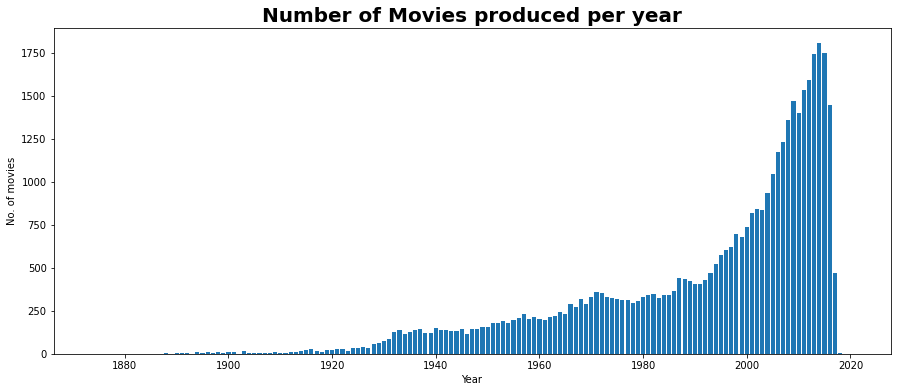

In [33]:
draw_bar_plot(movies_per_year.index,movies_per_year.values,'Number of Movies produced per year','Year','No. of movies')

In [34]:
df[df['release_date'] > '2018-01-01'][['title','release_date','revenue','status']]

,title,release_date,revenue,status
26559,Avatar 2,2020-12-16,0.0,In Production
30402,Bad Boys for Life,2018-11-07,0.0,Planned
33359,Iron Sky: The Coming Race,2018-03-01,0.0,Post Production
38130,Mary Shelley,2018-04-25,0.0,Post Production
38885,The Other Side of the Wind,2018-12-31,0.0,Post Production
44535,Mobile Homes,2018-04-04,0.0,Post Production


## Observations:
- __2014__ recorded highest number of movie releases with 1806 movies.
- In 2013 and 2015, almost same number ~1750 movies were released. 
- From __2018-20__, all 6 movies are NOT released yet.

## Average Movie revenue per year

In [35]:
revenue_per_year = df['revenue'].groupby(by=df['release_date'].dt.year).mean('revenue')
revenue_per_year.sort_values(ascending=False)

release_date
2017.0    2.264361e+07
2003.0    1.840205e+07
1997.0    1.839033e+07
2016.0    1.798441e+07
2004.0    1.793496e+07
              ...     
1909.0    0.000000e+00
1908.0    0.000000e+00
1907.0    0.000000e+00
1906.0    0.000000e+00
2020.0    0.000000e+00
Name: revenue, Length: 135, dtype: float64

Text(0, 0.5, 'Average revenue in 10^7')

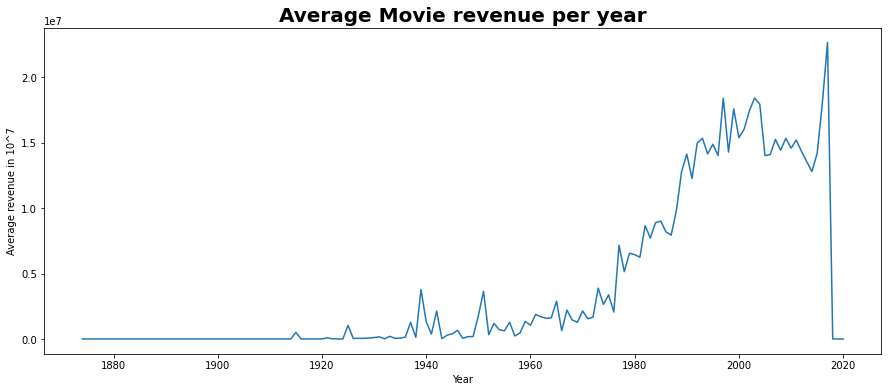

In [36]:
plt.figure(figsize=(15,6))
plt.plot(revenue_per_year.index,revenue_per_year.values)
plt.title('Average Movie revenue per year',fontsize=20,weight='bold')
plt.xlabel('Year')
plt.ylabel('Average revenue in 10^7')

## Why the revenue has fallen sharply ?
- No movies released from 2018
- All 6 movies are Planned, pre & post production phase.

In [37]:
# func to extract the movie type / genre from json

def get_name(value):
    
    s = str(value)
    s = s.replace("'","\"")
    
    obj = json.loads(s)
    
    if len(obj) == 0:
        return 'Unknown'
    
    return obj[0]["name"]

In [38]:
df['genres'] = df['genres'].apply(get_name)
df['genres']

0              Animation
1              Adventure
2                Romance
3                 Comedy
4                 Comedy
              ...       
45459    Science Fiction
45461              Drama
45462              Drama
45464            Unknown
45465            Unknown
Name: genres, Length: 42275, dtype: object

In [39]:
year_type_movies = df.groupby(by=[df['release_date'].dt.year,df['genres']]).title.count().sort_values(ascending=False).head(15)
year_type_movies

release_date  genres
2011.0        Drama     433
2013.0        Drama     407
2015.0        Drama     399
2014.0        Drama     389
2012.0        Drama     383
2009.0        Drama     374
2008.0        Drama     369
2010.0        Drama     367
2016.0        Drama     354
2006.0        Drama     334
2007.0        Drama     332
2013.0        Comedy    325
2014.0        Comedy    316
2015.0        Comedy    312
2016.0        Comedy    309
Name: title, dtype: int64

## Observation:
- From 2006-16, __Drama__ movies released was high in number compared to others.

## High budget Movies

In [40]:
# top 10 budget movies

high_budget_movies = df[['budget','title','release_date']].sort_values(by='budget',ascending=False).sort_values(by='budget',ascending=False).head(10)
high_budget_movies[['title','budget']].head(10)

,title,budget
17124,Pirates of the Caribbean: On Stranger Tides,380000000.0
11827,Pirates of the Caribbean: At World's End,300000000.0
26558,Avengers: Age of Ultron,280000000.0
11067,Superman Returns,270000000.0
44842,Transformers: The Last Knight,260000000.0
16130,Tangled,260000000.0
18685,John Carter,260000000.0
11780,Spider-Man 3,258000000.0
43255,The Fate of the Furious,250000000.0
18252,The Dark Knight Rises,250000000.0


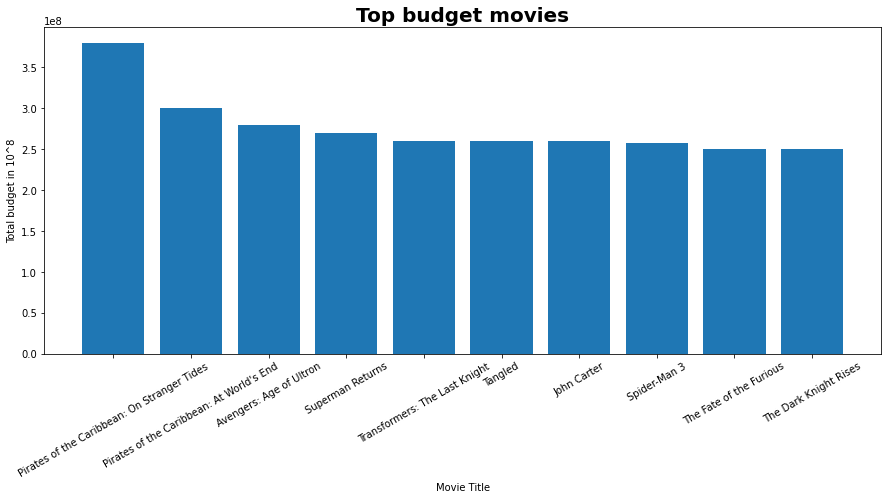

In [41]:
draw_bar_plot(high_budget_movies.title,high_budget_movies.budget,'Top budget movies','Movie Title','Total budget in 10^8',30)

## Popular Movies:

In [42]:
df['popularity'] = df['popularity'].astype('float32')
df.dtypes

adult                              bool
belongs_to_collection            object
budget                          float32
genres                           object
homepage                         object
id                               object
imdb_id                          object
original_language                object
original_title                   object
overview                         object
popularity                      float32
poster_path                      object
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
video                            object
vote_average                    float64
vote_count                      float64
dtype: object

In [43]:
popularity_df = df[['title','popularity']].sort_values(by='popularity',ascending=False).head(10)
popularity_df

,title,popularity
30700,Minions,547.488281
43644,Baby Driver,228.032745
24455,Big Hero 6,213.849915
26564,Deadpool,187.860489
26566,Guardians of the Galaxy Vol. 2,185.330994
14551,Avatar,185.070892
24351,John Wick,183.870377
23675,Gone Girl,154.801010
24873,The Hunger Games: Mockingjay - Part 1,147.098007
44274,War for the Planet of the Apes,146.161789


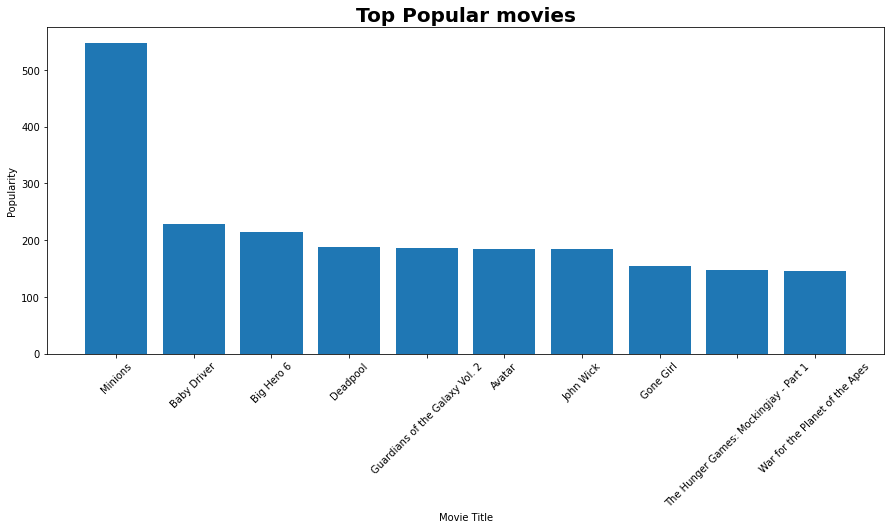

In [44]:
draw_bar_plot(popularity_df.title,popularity_df.popularity,'Top Popular movies','Movie Title','Popularity',45)

In [45]:
movie_type_df = df.groupby('genres').agg({'title':'count'}).sort_values(by='title',ascending = False).head(10)
movie_type_df

,title
genres,
Drama,10932
Comedy,8431
Action,4188
Documentary,3293
Horror,2361
Unknown,2282
Crime,1539
Thriller,1475
Adventure,1399


In [46]:
def draw_pie_plot(data, labels , title):
    plt.pie(data , labels = labels, autopct ='%1.1f%%',shadow = False,radius = 1.5)
    plt.title(title, fontsize = 15,weight = 'bold')

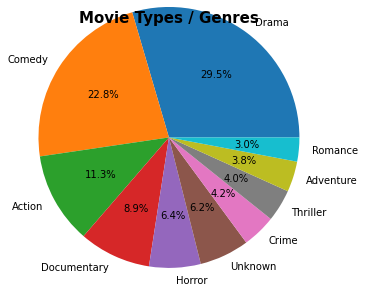

In [47]:
draw_pie_plot(movie_type_df.title, movie_type_df.index ,'Movie Types / Genres')

## Observation:
- Drama and Comedy movies are more than 50 % of the movies.
- Action, Documentary and Horror movies holds 27 % of the movies. 

In [48]:
# adult movies

adult_df = df[df['adult'] == True]
print('Total No. of adult movies :',len(adult_df))
adult_df[['title']]

Total No. of adult movies : 9


,title
19489,Erotic Nights of the Living Dead
28701,Standoff
31934,Electrical Girl
32113,Diet of Sex
39901,Amateur Porn Star Killer 2
39902,The Band
40574,The Sinful Dwarf
41009,Adulterers
43090,Half -Life


In [49]:
# Movies other then Released

df[df['status'] !='Released'][['title','status','release_date']]

,title,status,release_date
189,The Show,UNKNOWN,1995-08-25
682,Butterfly Kiss,Rumored,1995-08-18
767,The Gate of Heavenly Peace,UNKNOWN,1995-01-01
775,A Very Natural Thing,Rumored,1974-01-01
1032,The Sunchaser,Rumored,1996-05-29
...,...,...,...
45109,But What If This Is Love?,Rumored,1961-06-06
45159,Eating,UNKNOWN,1990-11-30
45207,Columbus,Post Production,2017-08-04
45289,King's Road,Rumored,2010-03-26


In [50]:
language_df = df['original_language'].value_counts().head(10)
language_df

en    30064
fr     2243
it     1450
ja     1290
de     1010
es      928
ru      726
hi      483
ko      395
zh      373
Name: original_language, dtype: int64

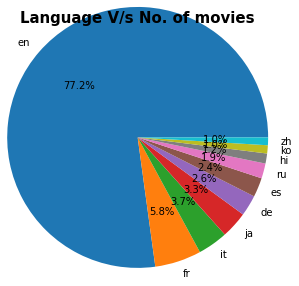

In [51]:
draw_pie_plot(language_df.values, language_df.index ,'Language V/s No. of movies')

## Observation:
- 77 % of movies are __english__ movies.
- __French__ occupies second place with ~6 % of movies. 

## Top Movie Production Countries:

In [52]:
# func to extract the country name from json

def get_country(value):
    
    if pd.isna(value):
        return value
    
    s = str(value)
    #s = s.replace("'","\"")
    #s = s.replace("Cote D'Ivoire","Cote DIvoire").replace("People's","Peoples").replace("'","\"")
    
    # ref from https://programmersought.com/article/14282670419/#:
    obj = json.loads(json.dumps(eval(s)))
    
    if len(obj) == 0:
        return 'Unknown'
    
    name = ""
    for i in range(len(obj)):
        name = name +','+ obj[i]["iso_3166_1"]
        
    return name[1:]

In [53]:
df['production_countries'] = df['production_countries'].apply(get_country)
df['production_countries']

0        US
1        US
2        US
3        US
4        US
         ..
45459    US
45461    IR
45462    PH
45464    RU
45465    GB
Name: production_countries, Length: 42275, dtype: object

In [54]:
top_production_countries = df.groupby('production_countries').agg({'title':'count'}).sort_values(by='title',ascending = False).head(10)
top_production_countries

,title
production_countries,
US,16711
Unknown,5883
GB,2035
FR,1524
JP,1302
IT,980
CA,783
IN,704
DE,700


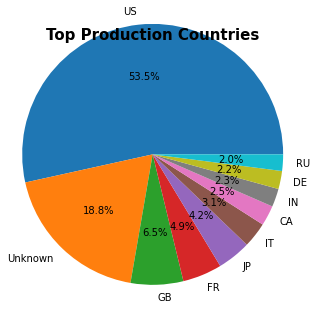

In [55]:
draw_pie_plot(top_production_countries.title,top_production_countries.index,'Top Production Countries')

## Top Production Companies in number of movies:

In [56]:
# function to extract the company name from the json

def get_company_name(value):
    
    if pd.isna(value):
        return value
    
    s = str(value)
    
    # ref from https://programmersought.com/article/14282670419/#:    
    obj = json.loads(json.dumps(eval(s)))
    
    if len(obj) == 0:
        return 'Unknown'
    
    name = ""
    
    for i in range(len(obj)):
        name = name +','+ obj[i]["name"]
        
    return name[1:].strip()

In [57]:
df['production_companies'] = df['production_companies'].apply(get_company_name)

In [58]:
top_production_companies_number = df.groupby('production_companies').agg({'title':'count'}).sort_values(by='title',ascending = False).head(10)
top_production_companies_number

,title
production_companies,
Unknown,11086
Metro-Goldwyn-Mayer (MGM),686
Warner Bros.,513
Paramount Pictures,468
Twentieth Century Fox Film Corporation,401
Universal Pictures,298
RKO Radio Pictures,229
Columbia Pictures Corporation,199
Columbia Pictures,139


In [59]:
# drop the Unknown row
top_production_companies_number.drop('Unknown',inplace = True)
top_production_companies_number

,title
production_companies,
Metro-Goldwyn-Mayer (MGM),686
Warner Bros.,513
Paramount Pictures,468
Twentieth Century Fox Film Corporation,401
Universal Pictures,298
RKO Radio Pictures,229
Columbia Pictures Corporation,199
Columbia Pictures,139
Mosfilm,130


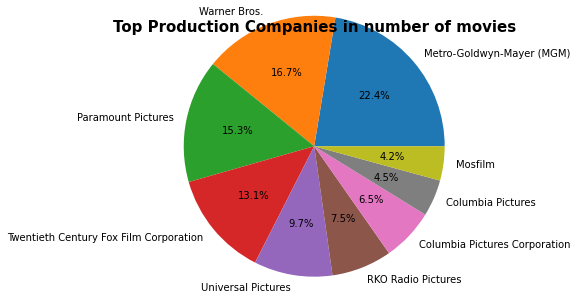

In [60]:
draw_pie_plot(top_production_companies_number.title, top_production_companies_number.index ,'Top Production Companies in number of movies')

## Top Production Companies in revenue:

In [61]:
top_production_companies_revenue = df.groupby('production_companies').agg({'revenue':'sum'}).sort_values(by='revenue',ascending = False).head(10)
top_production_companies_revenue

,revenue
production_companies,
Paramount Pictures,7.407702e+09
"Walt Disney Pictures,Pixar Animation Studios",6.234684e+09
DreamWorks Animation,5.678788e+09
"Blue Sky Studios,Twentieth Century Fox Animation",4.593632e+09
Marvel Studios,4.187450e+09
"Warner Bros.,Heyday Films",4.168478e+09
Universal Pictures,3.694598e+09
Columbia Pictures,3.530621e+09
"Universal Pictures,Illumination Entertainment",3.203801e+09


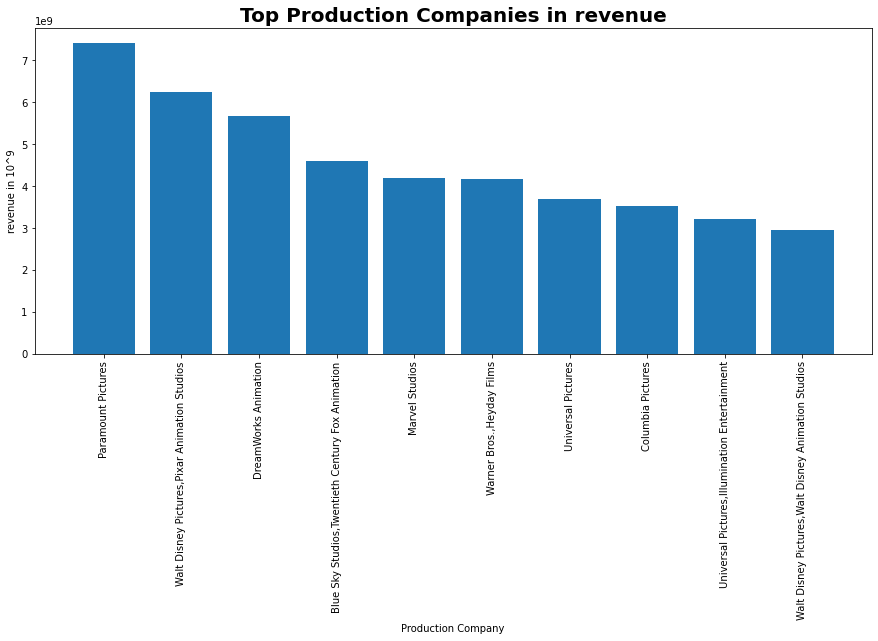

In [62]:
draw_bar_plot(top_production_companies_revenue.index,top_production_companies_revenue.revenue,'Top Production Companies in revenue','Production Company','revenue in 10^9',90)

## Longest Movies:

In [63]:
longest_movies = df.sort_values(by='runtime',ascending=False).head(10)[['title','runtime','original_language']]
longest_movies

,title,runtime,original_language
24178,Centennial,1256.0,en
19965,Jazz,1140.0,en
40938,Baseball,1140.0,en
13767,Berlin Alexanderplatz,931.0,de
13953,Heimat: A Chronicle of Germany,925.0,de
27855,The Story of Film: An Odyssey,900.0,en
34667,The Roosevelts: An Intimate History,840.0,en
34732,Seventeen Moments in Spring,840.0,ru
44758,Hollywood,780.0,en
9117,From the Earth to the Moon,720.0,en


## Read dataframe 2 from multiple files:

In [64]:
# ref from https://sparkbyexamples.com/pandas/pandas-read-multiple-csv-files/
# ref from https://stackoverflow.com/questions/10545957/creating-pandas-data-frame-from-multiple-files

rating_files_path = 'F:\\final-project\\ieee_dataport\\genre'
#to_read_files = glob.glob(rating_path+"\*.csv")

to_read_files = os.listdir(rating_files_path)

#print(to_read_files)

rating_list = (pd.read_csv(rating_files_path+'\\'+file) for file in to_read_files)

rating_df = pd.concat(rating_list, ignore_index = True)
rating_df.head()

,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,review_url
0,The Dark Knight,2008,PG-13,2h 32min,Action; Crime; Drama;,18 July 2008 (USA),9.0,2224522,6836,https://www.imdb.com/title/tt0468569/reviews/_...
1,Inception,2010,PG-13,2h 28min,Action; Adventure; Sci-Fi;,16 July 2010 (USA),8.8,1981675,3820,https://www.imdb.com/title/tt1375666/reviews/_...
2,The Matrix,1999,R,2h 16min,Action; Sci-Fi;,31 March 1999 (USA),8.7,1619761,4281,https://www.imdb.com/title/tt0133093/reviews/_...
3,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,2h 58min,Action; Adventure; Drama;,19 December 2001 (USA),8.8,1609165,5365,https://www.imdb.com/title/tt0120737/reviews/_...
4,The Dark Knight Rises,2012,PG-13,2h 44min,Action; Adventure;,20 July 2012 (USA),8.4,1470329,2979,https://www.imdb.com/title/tt1345836/reviews/_...


In [65]:
rating_df.shape

(1700, 10)

In [66]:
rating_df.isna().sum()

name            0
year            0
movie_rated     0
run_length      0
genres          0
release_date    0
rating          0
num_raters      0
num_reviews     0
review_url      0
dtype: int64

In [67]:
rating_df[rating_df['name'].str.lower().str.contains('pirates of')]

,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,review_url
14,Pirates of the Caribbean: The Curse of the Bla...,2003,PG-13,2h 23min,Action; Adventure; Fantasy;,9 July 2003 (USA),8.0,997264,2186,https://www.imdb.com/title/tt0325980/reviews/_...
47,Pirates of the Caribbean: Dead Man's Chest,2006,PG-13,2h 31min,Action; Adventure; Fantasy;,7 July 2006 (USA),7.3,641045,1889,https://www.imdb.com/title/tt0383574/reviews/_...
62,Pirates of the Caribbean: At World's End,2007,PG-13,2h 49min,Action; Adventure; Fantasy;,25 May 2007 (USA),7.1,582275,1290,https://www.imdb.com/title/tt0449088/reviews/_...
115,Pirates of the Caribbean: The Curse of the Bla...,2003,PG-13,2h 23min,Action; Adventure; Fantasy;,9 July 2003 (USA),8.0,997264,2186,https://www.imdb.com/title/tt0325980/reviews/_...
152,Pirates of the Caribbean: Dead Man's Chest,2006,PG-13,2h 31min,Action; Adventure; Fantasy;,7 July 2006 (USA),7.3,641045,1889,https://www.imdb.com/title/tt0383574/reviews/_...
171,Pirates of the Caribbean: At World's End,2007,PG-13,2h 49min,Action; Adventure; Fantasy;,25 May 2007 (USA),7.1,582275,1290,https://www.imdb.com/title/tt0449088/reviews/_...
706,Pirates of the Caribbean: The Curse of the Bla...,2003,PG-13,2h 23min,Action; Adventure; Fantasy;,9 July 2003 (USA),8.0,997264,2186,https://www.imdb.com/title/tt0325980/reviews/_...
713,Pirates of the Caribbean: Dead Man's Chest,2006,PG-13,2h 31min,Action; Adventure; Fantasy;,7 July 2006 (USA),7.3,641045,1889,https://www.imdb.com/title/tt0383574/reviews/_...
718,Pirates of the Caribbean: At World's End,2007,PG-13,2h 49min,Action; Adventure; Fantasy;,25 May 2007 (USA),7.1,582275,1290,https://www.imdb.com/title/tt0449088/reviews/_...
732,Pirates of the Caribbean: On Stranger Tides,2011,PG-13,2h 16min,Action; Adventure; Fantasy;,20 May 2011 (USA),6.6,469914,535,https://www.imdb.com/title/tt1298650/reviews/_...


## Remove Duplicates

In [68]:
# https://datatofish.com/remove-duplicates-pandas-dataframe/
# same movie is there is multiple files. hence dropping the duplicates
# drop the duplicates only by comparing name

rating_unique_df = rating_df.drop_duplicates(subset=['name'])
rating_unique_df

,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,review_url
0,The Dark Knight,2008,PG-13,2h 32min,Action; Crime; Drama;,18 July 2008 (USA),9.0,2224522,6836,https://www.imdb.com/title/tt0468569/reviews/_...
1,Inception,2010,PG-13,2h 28min,Action; Adventure; Sci-Fi;,16 July 2010 (USA),8.8,1981675,3820,https://www.imdb.com/title/tt1375666/reviews/_...
2,The Matrix,1999,R,2h 16min,Action; Sci-Fi;,31 March 1999 (USA),8.7,1619761,4281,https://www.imdb.com/title/tt0133093/reviews/_...
3,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,2h 58min,Action; Adventure; Drama;,19 December 2001 (USA),8.8,1609165,5365,https://www.imdb.com/title/tt0120737/reviews/_...
4,The Dark Knight Rises,2012,PG-13,2h 44min,Action; Adventure;,20 July 2012 (USA),8.4,1470329,2979,https://www.imdb.com/title/tt1345836/reviews/_...
...,...,...,...,...,...,...,...,...,...,...
1695,Catch-22,1970,R,2h 2min,Comedy; Drama; War;,24 June 1970 (USA),7.1,21424,145,https://www.imdb.com/title/tt0065528/reviews/_...
1696,The Great Raid,2005,R,2h 12min,Action; Drama; War;,12 August 2005 (USA),6.7,20965,194,https://www.imdb.com/title/tt0326905/reviews/_...
1697,Saints and Soldiers,2003,PG-13,1h 30min,Action; Drama; War;,25 March 2005 (USA),6.7,19730,163,https://www.imdb.com/title/tt0373283/reviews/_...
1698,Stop-Loss,2008,R,1h 52min,Drama; War;,28 March 2008 (USA),6.4,19456,102,https://www.imdb.com/title/tt0489281/reviews/_...


In [69]:
rating_unique_df[rating_unique_df['name'].str.lower().str.contains('pirates of')]

,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,review_url
14,Pirates of the Caribbean: The Curse of the Bla...,2003,PG-13,2h 23min,Action; Adventure; Fantasy;,9 July 2003 (USA),8.0,997264,2186,https://www.imdb.com/title/tt0325980/reviews/_...
47,Pirates of the Caribbean: Dead Man's Chest,2006,PG-13,2h 31min,Action; Adventure; Fantasy;,7 July 2006 (USA),7.3,641045,1889,https://www.imdb.com/title/tt0383574/reviews/_...
62,Pirates of the Caribbean: At World's End,2007,PG-13,2h 49min,Action; Adventure; Fantasy;,25 May 2007 (USA),7.1,582275,1290,https://www.imdb.com/title/tt0449088/reviews/_...
732,Pirates of the Caribbean: On Stranger Tides,2011,PG-13,2h 16min,Action; Adventure; Fantasy;,20 May 2011 (USA),6.6,469914,535,https://www.imdb.com/title/tt1298650/reviews/_...
777,Pirates of the Caribbean: Dead Men Tell No Tales,2017,PG-13,2h 9min,Action; Adventure; Fantasy;,26 May 2017 (USA),6.6,251787,652,https://www.imdb.com/title/tt1790809/reviews/_...


In [70]:
rating_unique_df[rating_unique_df['name'].str.contains('The Dark Knight')]

,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,review_url
0,The Dark Knight,2008,PG-13,2h 32min,Action; Crime; Drama;,18 July 2008 (USA),9.0,2224522,6836,https://www.imdb.com/title/tt0468569/reviews/_...
4,The Dark Knight Rises,2012,PG-13,2h 44min,Action; Adventure;,20 July 2012 (USA),8.4,1470329,2979,https://www.imdb.com/title/tt1345836/reviews/_...


In [71]:
rating_unique_df.dtypes

name             object
year              int64
movie_rated      object
run_length       object
genres           object
release_date     object
rating          float64
num_raters        int64
num_reviews       int64
review_url       object
dtype: object

In [72]:
def get_date(s):
    
    return s.split('(')[0].strip()
    

In [73]:
# rating_unique_df.loc[:'release_date'] = rating_unique_df.loc[:'release_date'].apply(get_date)

#rating_unique_df['release_date'] = 
rating_unique_df['release_date'].apply(get_date)

rating_unique_df

,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,review_url
0,The Dark Knight,2008,PG-13,2h 32min,Action; Crime; Drama;,18 July 2008 (USA),9.0,2224522,6836,https://www.imdb.com/title/tt0468569/reviews/_...
1,Inception,2010,PG-13,2h 28min,Action; Adventure; Sci-Fi;,16 July 2010 (USA),8.8,1981675,3820,https://www.imdb.com/title/tt1375666/reviews/_...
2,The Matrix,1999,R,2h 16min,Action; Sci-Fi;,31 March 1999 (USA),8.7,1619761,4281,https://www.imdb.com/title/tt0133093/reviews/_...
3,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,2h 58min,Action; Adventure; Drama;,19 December 2001 (USA),8.8,1609165,5365,https://www.imdb.com/title/tt0120737/reviews/_...
4,The Dark Knight Rises,2012,PG-13,2h 44min,Action; Adventure;,20 July 2012 (USA),8.4,1470329,2979,https://www.imdb.com/title/tt1345836/reviews/_...
...,...,...,...,...,...,...,...,...,...,...
1695,Catch-22,1970,R,2h 2min,Comedy; Drama; War;,24 June 1970 (USA),7.1,21424,145,https://www.imdb.com/title/tt0065528/reviews/_...
1696,The Great Raid,2005,R,2h 12min,Action; Drama; War;,12 August 2005 (USA),6.7,20965,194,https://www.imdb.com/title/tt0326905/reviews/_...
1697,Saints and Soldiers,2003,PG-13,1h 30min,Action; Drama; War;,25 March 2005 (USA),6.7,19730,163,https://www.imdb.com/title/tt0373283/reviews/_...
1698,Stop-Loss,2008,R,1h 52min,Drama; War;,28 March 2008 (USA),6.4,19456,102,https://www.imdb.com/title/tt0489281/reviews/_...


## Merge the dataframes:

In [74]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html
# https://stackoverflow.com/questions/44593284/python-pandas-dataframe-merge-and-pick-only-few-columns
# pick only few columns from 2nd dataframe
# making it left join to avoid new entries from 2nd dataframe

rating_df_columns = ['name', 'movie_rated','release_date','rating', 'num_raters', 'num_reviews','review_url']

merge_df = pd.merge(df, rating_unique_df[rating_df_columns], left_on = 'title', right_on = 'name',how = 'left',suffixes = ('_movie' , '_rating'))
merge_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,video,vote_average,vote_count,name,movie_rated,release_date_rating,rating,num_raters,num_reviews,review_url
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,Animation,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,False,7.7,5415.0,Toy Story,G,22 November 1995 (USA),8.3,858215.0,606.0,https://www.imdb.com/title/tt0114709/reviews/_...
1,False,,65000000.0,Adventure,,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,False,6.9,2413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,Romance,,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,False,6.5,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,,16000000.0,Comedy,,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,False,6.1,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,Comedy,,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,False,5.7,173.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
merge_df.shape

(42275, 31)

In [76]:
merge_df.isna().sum()

adult                        0
belongs_to_collection        0
budget                       0
genres                       0
homepage                     0
id                           0
imdb_id                      0
original_language            0
original_title               0
overview                     0
popularity                   0
poster_path                  0
production_companies         0
production_countries         0
release_date_movie          81
revenue                      0
runtime                      0
spoken_languages             0
status                       0
tagline                      0
title                        0
video                        0
vote_average                 0
vote_count                   0
name                     41228
movie_rated              41228
release_date_rating      41228
rating                   41228
num_raters               41228
num_reviews              41228
review_url               41228
dtype: int64

In [77]:
# fill columns from 2nd dataset NA values with first column values

merge_df['name'] = merge_df['title'] 
merge_df['release_date_rating'] = merge_df['release_date_movie']

In [78]:
# fill the unmatched NA values with 0 and ""

merge_df['rating'].fillna(0,inplace=True)
merge_df['num_raters'].fillna(0,inplace=True)
merge_df['num_reviews'].fillna(0,inplace=True)
merge_df['review_url'].fillna("",inplace=True)
merge_df['movie_rated'].fillna("NA",inplace=True)

merge_df.isna().sum()

adult                     0
belongs_to_collection     0
budget                    0
genres                    0
homepage                  0
id                        0
imdb_id                   0
original_language         0
original_title            0
overview                  0
popularity                0
poster_path               0
production_companies      0
production_countries      0
release_date_movie       81
revenue                   0
runtime                   0
spoken_languages          0
status                    0
tagline                   0
title                     0
video                     0
vote_average              0
vote_count                0
name                      0
movie_rated               0
release_date_rating      81
rating                    0
num_raters                0
num_reviews               0
review_url                0
dtype: int64

## Validate the merge results:

In [79]:
merge_df[['title','name','release_date_movie','release_date_rating']]

,title,name,release_date_movie,release_date_rating
0,Toy Story,Toy Story,1995-10-30,1995-10-30
1,Jumanji,Jumanji,1995-12-15,1995-12-15
2,Grumpier Old Men,Grumpier Old Men,1995-12-22,1995-12-22
3,Waiting to Exhale,Waiting to Exhale,1995-12-22,1995-12-22
4,Father of the Bride Part II,Father of the Bride Part II,1995-02-10,1995-02-10
...,...,...,...,...
42270,Caged Heat 3000,Caged Heat 3000,1995-01-01,1995-01-01
42271,Subdue,Subdue,NaT,NaT
42272,Century of Birthing,Century of Birthing,2011-11-17,2011-11-17
42273,Satan Triumphant,Satan Triumphant,1917-10-21,1917-10-21


In [80]:
top_raters = merge_df[['title','num_raters']].sort_values(by='num_raters',ascending=False).head(10)
top_raters

,title,num_raters
314,The Shawshank Redemption,2258845.0
12075,The Dark Knight,2224522.0
14898,Inception,1981675.0
2814,Fight Club,1794454.0
292,Pulp Fiction,1767445.0
351,Forrest Gump,1741097.0
2437,The Matrix,1619761.0
4806,The Lord of the Rings: The Fellowship of the Ring,1609165.0
6884,The Lord of the Rings: The Return of the King,1593859.0
834,The Godfather,1558661.0


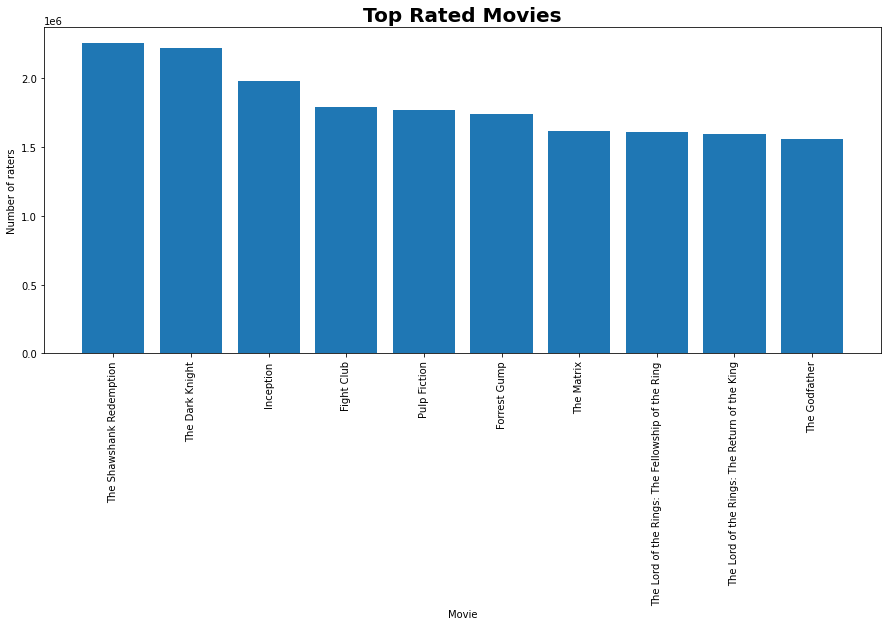

In [81]:
draw_bar_plot(top_raters.title,top_raters.num_raters,'Top Rated Movies','Movie','Number of raters',90)

## Movies with highest rating:

In [82]:
top_ratings = merge_df[['title','rating','budget']].sort_values(by='rating',ascending=False).head(10)
top_ratings

,title,rating,budget
314,The Shawshank Redemption,9.3,25000000.0
834,The Godfather,9.2,6000000.0
1176,The Godfather: Part II,9.0,13000000.0
12075,The Dark Knight,9.0,185000000.0
292,Pulp Fiction,8.9,8000000.0
6884,The Lord of the Rings: The Return of the King,8.9,94000000.0
522,Schindler's List,8.9,22000000.0
1159,12 Angry Men,8.9,350000.0
4806,The Lord of the Rings: The Fellowship of the Ring,8.8,93000000.0
351,Forrest Gump,8.8,55000000.0


In [83]:
top_budget_ratings = merge_df.sort_values(by = 'budget', ascending = False)[['title','budget','rating','vote_count']].head(10)
top_movie_budget_ratings = top_budget_ratings.sort_values(by='rating',ascending=False)
top_movie_budget_ratings

,title,budget,rating,vote_count
19071,The Hobbit: An Unexpected Journey,250000000.0,7.8,8427.0
15509,Tangled,260000000.0,7.7,3419.0
24007,The Hobbit: The Battle of the Five Armies,250000000.0,7.4,4884.0
25059,Avengers: Age of Ultron,280000000.0,7.3,6908.0
11451,Pirates of the Caribbean: At World's End,300000000.0,7.1,4627.0
16427,Pirates of the Caribbean: On Stranger Tides,380000000.0,6.6,5068.0
11408,Spider-Man 3,258000000.0,6.2,3687.0
10738,Superman Returns,270000000.0,0.0,1429.0
41713,Transformers: The Last Knight,260000000.0,0.0,1440.0
17869,John Carter,260000000.0,0.0,2170.0


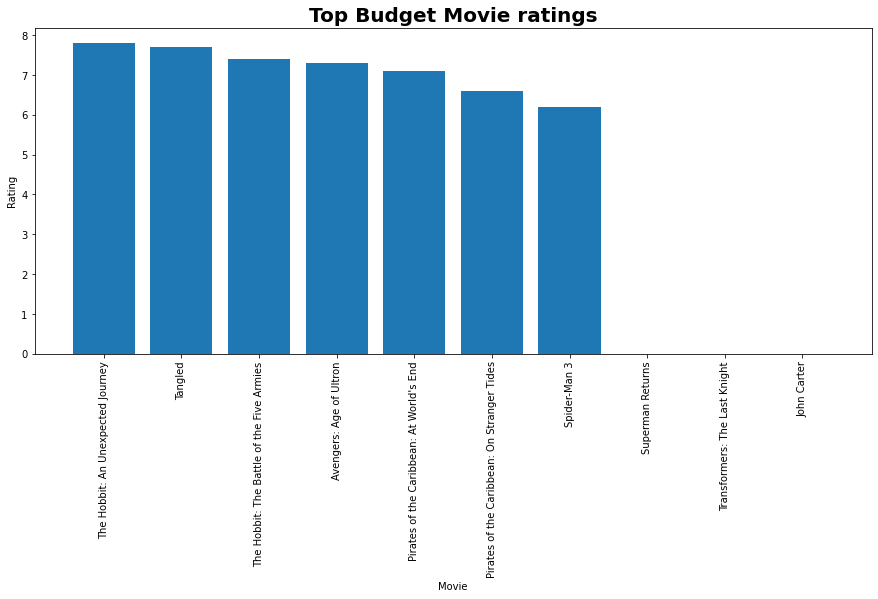

In [84]:
draw_bar_plot(top_movie_budget_ratings.title,top_movie_budget_ratings.rating,'Top Budget Movie ratings','Movie','Rating',90)

## Hypothesis:
- Movie ratings are not relavant to the budget and popularity.
- Top budget movies got rating between 7-8.

## Movies with lowest rating

In [85]:
lowest_ratings = merge_df[['title','rating','budget']][merge_df['rating'] > 0].sort_values(by='rating').head(10)
lowest_ratings

,title,rating,budget
1666,Spice World,3.5,25000000.0
12044,The Love Guru,3.8,62000000.0
25838,Fifty Shades of Grey,4.1,40000000.0
17518,In the Land of Blood and Honey,4.5,10000000.0
4094,Driven,4.6,94000000.0
13901,The Twilight Saga: New Moon,4.7,50000000.0
17376,The Twilight Saga: Breaking Dawn - Part 1,4.9,110000000.0
14829,The Twilight Saga: Eclipse,5.0,68000000.0
12276,The Happening,5.0,60000000.0
16864,Happy New Year,5.0,0.0


## Different Movie ratings: [Rating Info](https://www.showbizjunkies.com/mpaa-ratings/)
- Most of the movies doesn't have ratings.

In [86]:
merge_df['movie_rated'].value_counts()

NA           41228
R              442
PG-13          366
PG             153
G               34
Not Rated       29
Approved         8
Passed           8
GP               2
TV-MA            2
NC-17            1
M/PG             1
TV-PG            1
Name: movie_rated, dtype: int64

## Highest Voted Movies:

In [87]:
highest_voted = merge_df.sort_values(by='vote_count',ascending=False).head(10)[['title','vote_count','original_language','budget']]
highest_voted

,title,vote_count,original_language,budget
14898,Inception,14075.0,en,160000000.0
12075,The Dark Knight,12269.0,en,185000000.0
14015,Avatar,12114.0,en,237000000.0
25064,Deadpool,11444.0,en,58000000.0
21742,Interstellar,11187.0,en,165000000.0
19145,Django Unchained,10297.0,en,100000000.0
22527,Guardians of the Galaxy,10014.0,en,170000000.0
2814,Fight Club,9678.0,en,63000000.0
17463,The Hunger Games,9634.0,en,75000000.0
25055,Mad Max: Fury Road,9629.0,en,150000000.0


# Conclusion:
- There was a sharp increase in the number of movies produced per year from __1995-2018__. It could be because of advancement in technology.
- The movie revenue gradually increased from __1980-2017__ with a litte drop during __2011-14__.
- No movies were released from 2018, all 6 movies are planned and in production phase. 
- __Pirates of the Caribbean__: (On Stranger Tides & At World's End) are the top 2 budget movies.
- Based on the popularity index, __Minions__ is the most popular movie.
- __Drama__ and __Comedy__ movies are 50 % of the total movies and __Action__, __Documentary__ and __Horror__ movies holds for remaining 27 % of movies.
- __US__ is the top movie producing country and the highest voted movies are __English__.
- __Metro-Goldwyn-Mayer (MGM)__ and __Warner Bros__ are the top production companies.
- __The Shawshank Redemption__, __The GodFather__ and __The Dark Knight__ movies has got the highest rating of 9.3 , 9.2 & 9 respectively.
- __Inception__ is the highest voted movie with 14,075 votes and having budget of $160 million  